In [1]:
# Import the required libraries
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from features_helper import *
from plot_helper import *

init_style()

In [2]:
data_path = 'data/diplomacy_data.json'

# Load the json data
with open(data_path) as data_file:
    data_json = json.load(data_file)

## Loading the features

In [3]:
# Get the last friendly action for each friendship
last_friendly_action = get_last_friendly_action(data_json)

In [4]:
season_features_victim = load_season_features(data_json, last_friendly_action, 'victim')
season_features_betrayer = load_season_features(data_json, last_friendly_action, 'betrayer')
season_features = pd.concat([season_features_victim, season_features_betrayer])
season_features.head()

,idx,season,betrayal,support,n_requests,n_words,politeness,n_sentences,sentiment.positive,sentiment.neutral,...,premise,expansion,comparison,planning,claim,temporal,contingency,last_season,n_messages,player_type
0,0,1906.5,True,1,3.250000,120.000000,0.809993,7.750000,1.500000,1.250000,...,4.750000,1.0,1.250000,1.000000,0.500000,1.250000,0.250000,1909.0,4,victim
1,0,1907.0,True,0,0.666667,31.000000,0.785508,3.000000,1.333333,0.666667,...,0.333333,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1909.0,3,victim
2,0,1907.5,True,0,3.666667,120.000000,0.607331,9.333333,1.000000,3.666667,...,2.000000,1.0,0.333333,0.333333,0.000000,0.000000,0.333333,1909.0,3,victim
3,0,1908.0,True,0,0.500000,28.000000,0.571134,3.000000,1.000000,0.000000,...,1.000000,1.0,0.500000,1.000000,0.500000,0.500000,0.500000,1909.0,2,victim
4,0,1908.5,True,0,2.333333,85.333333,0.563423,5.000000,0.666667,1.666667,...,1.000000,1.0,0.000000,0.666667,0.333333,0.333333,0.000000,1909.0,3,victim


In [5]:
friendship_features = get_friendship_features(season_features)
friendship_features.head()

,idx,player_type,betrayal,mean_support,mean_n_requests,mean_n_words,mean_politeness,mean_n_sentences,mean_sentiment.positive,mean_sentiment.neutral,...,var_sentiment.negative,var_subjectivity,var_premise,var_expansion,var_comparison,var_planning,var_claim,var_temporal,var_contingency,var_n_messages
0,0,betrayer,True,1.000000,2.830952,75.411111,0.792530,3.792063,1.046032,1.192857,...,0.209346,73.932396,0.142438,0.740775,0.609116,0.504082,0.607714,0.549301,1.733791,4.566667
1,0,victim,True,0.166667,2.069444,72.972222,0.685290,5.597222,1.083333,1.458333,...,2.374074,24.449074,2.545602,0.175000,0.212269,0.211111,0.062963,0.212269,0.051157,0.566667
2,1,betrayer,False,1.000000,0.750000,12.083333,0.432853,1.416667,0.000000,0.583333,...,0.166667,1.841667,0.041667,0.175000,0.166667,0.166667,0.000000,0.000000,0.166667,0.266667
3,1,victim,False,0.200000,0.800000,22.400000,0.493841,2.400000,0.200000,1.200000,...,1.500000,3.300000,0.200000,0.800000,0.800000,0.300000,0.000000,0.200000,0.800000,0.000000
4,2,betrayer,False,0.444444,1.111111,60.888889,0.558239,2.444444,0.333333,0.666667,...,1.465278,30.812500,0.187500,0.000000,0.000000,0.000000,0.111111,0.027778,0.027778,0.194444


In [6]:
final_features = merge_player_features(friendship_features, on=['idx', 'betrayal'])
final_features.head()

,idx,betrayal,mean_support_victim,mean_n_requests_victim,mean_n_words_victim,mean_politeness_victim,mean_n_sentences_victim,mean_sentiment.positive_victim,mean_sentiment.neutral_victim,mean_sentiment.negative_victim,...,var_sentiment.negative_betrayer,var_subjectivity_betrayer,var_premise_betrayer,var_expansion_betrayer,var_comparison_betrayer,var_planning_betrayer,var_claim_betrayer,var_temporal_betrayer,var_contingency_betrayer,var_n_messages_betrayer
0,0,True,0.166667,2.069444,72.972222,0.685290,5.597222,1.083333,1.458333,3.055556,...,0.209346,73.932396,0.142438,0.740775,0.609116,0.504082,0.607714,0.549301,1.733791,4.566667
1,1,False,0.200000,0.800000,22.400000,0.493841,2.400000,0.200000,1.200000,1.000000,...,0.166667,1.841667,0.041667,0.175000,0.166667,0.166667,0.000000,0.000000,0.166667,0.266667
2,2,False,0.875000,0.750000,35.062500,0.412080,1.937500,0.187500,0.687500,1.062500,...,1.465278,30.812500,0.187500,0.000000,0.000000,0.000000,0.111111,0.027778,0.027778,0.194444
3,3,False,0.250000,4.166667,120.729167,0.694526,6.208333,1.416667,1.312500,3.479167,...,2.062500,28.173611,0.840278,1.506944,0.451389,0.694444,0.250000,0.173611,0.527778,0.666667
4,4,False,1.000000,3.375000,44.875000,0.572625,3.750000,0.875000,1.000000,1.875000,...,0.488426,11.988426,0.027778,0.118056,0.175926,0.250000,0.173611,0.062500,0.222222,0.916667


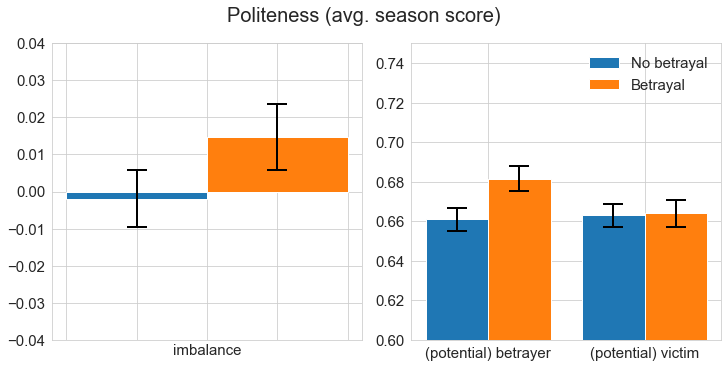

In [7]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharex=False, sharey=False, constrained_layout=True)
fig.suptitle('Politeness (avg. season score)')

draw_imbalance_plot(ax1, ax2, season_features, 'politeness', (-0.04, 0.04), (0.6, 0.75), True)

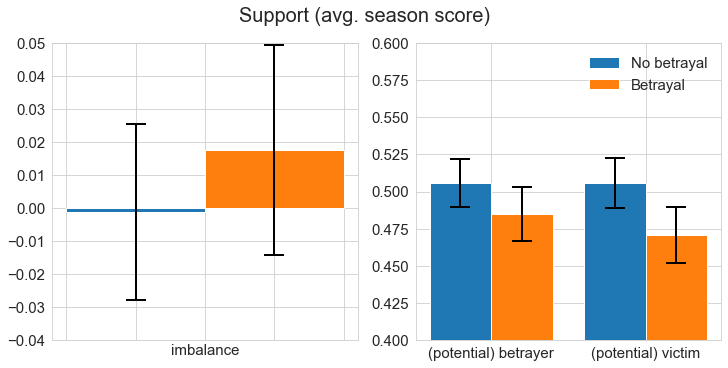

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharex=False, sharey=False, constrained_layout=True)
fig.suptitle('Support (avg. season score)')

draw_imbalance_plot(ax1, ax2, season_features, 'support', (-0.04, 0.05), (0.40, 0.6), True)

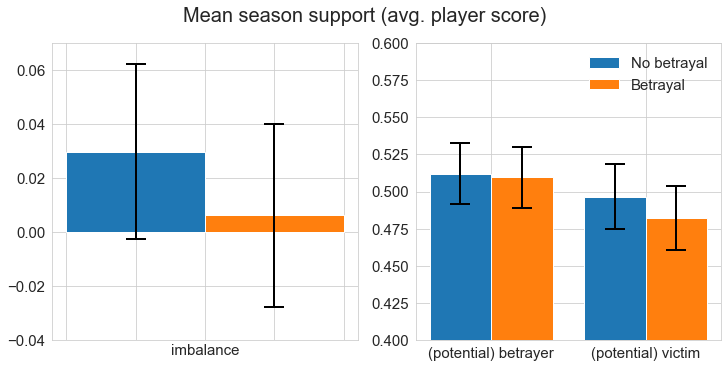

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharex=False, sharey=False, constrained_layout=True)
fig.suptitle('Mean season support (avg. player score)')

draw_imbalance_plot(ax1, ax2, friendship_features, 'mean_support', (-0.04, 0.07), (0.4, 0.6), True, 'friendship')

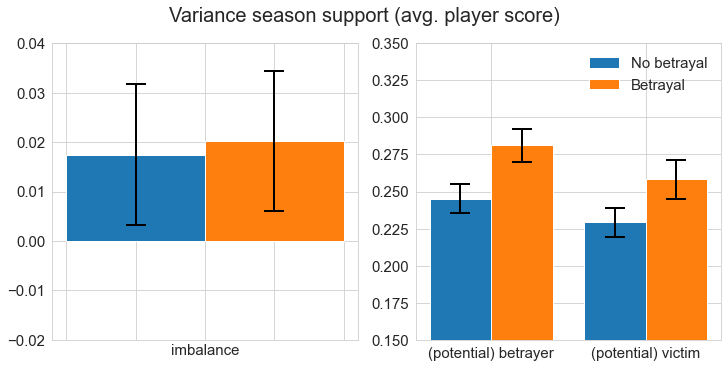

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharex=False, sharey=False, constrained_layout=True)
fig.suptitle('Variance season support (avg. player score)')

draw_imbalance_plot(ax1, ax2, friendship_features, 'var_support', (-0.02, 0.04), (0.15, 0.35), True, 'friendship')

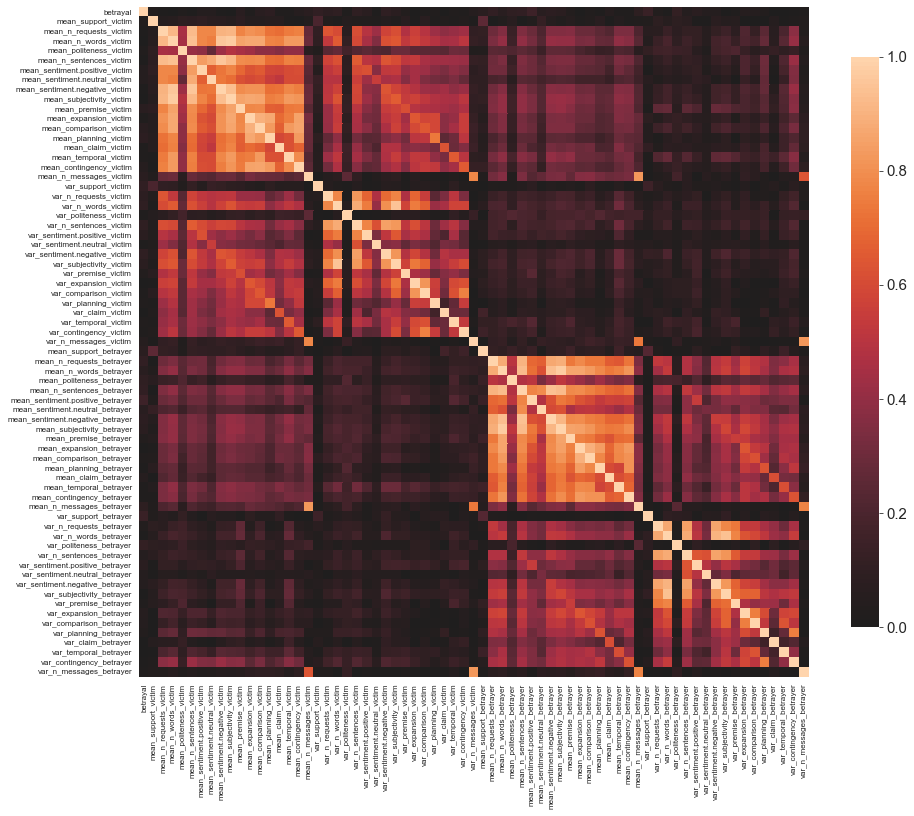

In [11]:
corr = final_features.drop(columns=['idx']).corr().abs()
corr_plot(corr)

In [15]:
betrayal_corr = corr.loc[corr.columns[1]:, 'betrayal'].to_frame().reset_index()
betrayal_corr = betrayal_corr.rename(columns={'betrayal' : 'betrayal_correlation'})
betrayal_corr['feature_type'] = 'Mean'
betrayal_corr.loc[betrayal_corr['index'].str.startswith('var'), 'feature_type'] = 'Variance'

betrayal_corr = betrayal_corr.sort_values(by='betrayal_correlation', ascending=False)
betrayal_corr.head(5)

,index,betrayal_correlation,feature_type
39,mean_sentiment.positive_betrayer,0.148994,Mean
51,var_support_betrayer,0.135490,Variance
54,var_politeness_betrayer,0.114156,Variance
38,mean_n_sentences_betrayer,0.107543,Mean
35,mean_n_requests_betrayer,0.105637,Mean


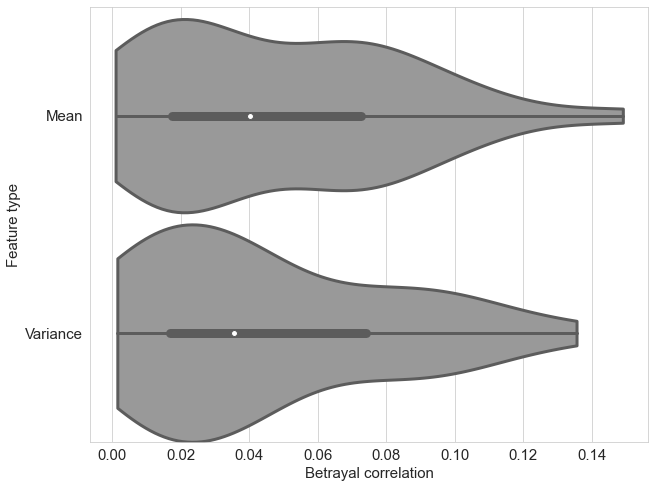

In [13]:
feature_type_corr_plot(betrayal_corr)